## Details 

El fichero data.csv contiene los datos necesarios para crear vuestros modelos, y está compuesto por las siguientes columnas:

- price: in US dollars [TARGET]
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
- table: width of top of diamond relative to widest point

El fichero **predict.csv** contiene las mismas columnas, com excepción de la columna price, que será tu tarea predecir. El fichero sample_submission.csv contiene un ejemplo del formato en que debe estar tu submission.

Atención! Los index en el submission deben ser los mismos de `predict.csv`, y todos los elementos deben estar presentes. Además del index, el submission debe contener la columna `price` con las predicciones.


## Tools

Puedes, y debes, probar diferentes modelos, parámetros y preparación de los datos. La documentación de sklearn será tú mejor amiga:

- [Pre Processing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- [Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
- [Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

nota: La métrica utilizada en esa competición será el RMSE.

Referencias: 

- [IGS - Measurements](https://www.gemsociety.org/article/diamond-measurements/)
- [The Diamond Pro - Clarity](https://www.diamonds.pro/education/clarity/)
- [The Diamond Pro - Proportions](https://www.diamonds.pro/guides/diamond-proportion/)
- [Loose Diamond - Cuts](https://www.loosediamondsreviews.com/diamondcut.html)
- [Beyond - Colors](https://beyond4cs.com/color/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_csv("data/data.csv", index_col=0)
data_predict = pd.read_csv("data/predict.csv", index_col=0)

In [2]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
0,1.01,Ideal,G,VVS2,60.6,57.0,6.54,6.50,3.95,7167
1,0.31,Good,F,SI1,63.5,56.0,4.30,4.33,2.74,516
2,1.02,Premium,D,SI2,59.5,62.0,6.56,6.52,3.89,4912
3,0.27,Ideal,E,VVS2,62.0,55.0,4.12,4.14,2.56,622
4,0.70,Very Good,F,VS2,61.7,63.0,5.64,5.61,3.47,2762


In [3]:
data_predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
0,1.57,Premium,F,SI1,60.4,59.0,7.57,7.54,4.56
1,1.56,Ideal,G,SI1,61.2,56.0,7.51,7.49,4.59
2,0.70,Premium,E,VS1,58.4,59.0,5.91,5.83,3.43
3,0.90,Fair,G,SI1,65.4,57.0,6.04,5.95,3.92
4,1.22,Ideal,H,VS2,61.4,57.0,6.89,6.85,4.22


In [4]:
data.shape

(37758, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 0 to 37757
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37758 non-null  float64
 1   cut      37758 non-null  object 
 2   color    37758 non-null  object 
 3   clarity  37758 non-null  object 
 4   depth    37758 non-null  float64
 5   table    37758 non-null  float64
 6   x        37758 non-null  float64
 7   y        37758 non-null  float64
 8   z        37758 non-null  float64
 9   price    37758 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


In [6]:
data.shape

(37758, 10)

In [7]:
data['color'].unique()

array(['G', 'F', 'D', 'E', 'I', 'J', 'H'], dtype=object)

In [8]:
data['clarity'].unique()

array(['VVS2', 'SI1', 'SI2', 'VS2', 'VS1', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [9]:
data['cut'].unique()

array(['Ideal', 'Good', 'Premium', 'Very Good', 'Fair'], dtype=object)

# Visualize data

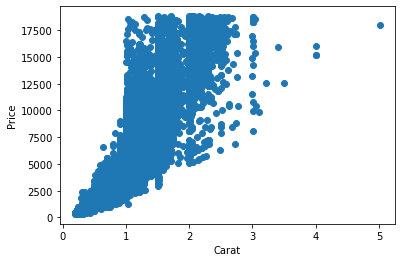

In [10]:
plt.scatter(data["carat"], data["price"])
plt.xlabel("Carat")
plt.ylabel("Price"); 

# Define y and X

In [11]:
y = data['price']
X = data.drop(columns=['price'])

In [12]:
y.head()

index
0    7167
1     516
2    4912
3     622
4    2762
Name: price, dtype: int64

In [13]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
0,1.01,Ideal,G,VVS2,60.6,57.0,6.54,6.50,3.95
1,0.31,Good,F,SI1,63.5,56.0,4.30,4.33,2.74
2,1.02,Premium,D,SI2,59.5,62.0,6.56,6.52,3.89
3,0.27,Ideal,E,VVS2,62.0,55.0,4.12,4.14,2.56
4,0.70,Very Good,F,VS2,61.7,63.0,5.64,5.61,3.47


# Training and test, Data split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
X_train.shape, X_test.shape

((28318, 9), (9440, 9))

# Categorical Data 

## Testing label encoder 

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enc = LabelEncoder()

In [18]:
#color_classes = ["J", "I","H", "G", "F", "E", "D"]

In [19]:
enc.fit(X_train["color"])

LabelEncoder()

In [20]:
enc.classes_

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [21]:
X_train["color"] =  enc.transform(X_train["color"])

/tmp/ipykernel_1341/1530664088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["color"] =  enc.transform(X_train["color"])


In [22]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
8408,1.00,Very Good,1,VVS1,62.7,54.0,6.36,6.39,4.00
19421,1.28,Ideal,3,I1,61.6,57.0,6.93,6.96,4.28
14838,0.58,Ideal,2,VS1,62.4,57.0,5.36,5.32,3.33
33711,1.24,Ideal,4,SI1,60.9,57.0,6.90,6.95,4.22
22023,0.51,Good,2,VVS2,62.4,63.0,5.05,5.08,3.16


In [23]:
#esta forma no me funciona, ya que esta colocando a la D como 0, dandole el menor valor en relacion. 

## Testing OneHotEncoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Cut Category

In [26]:
ohe.fit(X_train[["cut"]])

OneHotEncoder()

In [27]:
ohe.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)]

In [28]:
enc_color_train = ohe.transform(X_train[["cut"]])

In [29]:
enc_color_train

<28318x5 sparse matrix of type '<class 'numpy.float64'>'
	with 28318 stored elements in Compressed Sparse Row format>

In [30]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
1644,1.50,Very Good,I,VS2,59.4,61.0,7.41,7.45,4.41
23075,1.14,Premium,F,SI1,62.5,59.0,6.67,6.65,4.16
28360,0.51,Premium,F,SI2,61.1,59.0,5.15,5.09,3.13
8942,0.38,Ideal,F,VS1,61.1,56.0,4.69,4.71,2.87
18446,0.42,Premium,E,SI1,61.5,58.0,4.84,4.78,2.96


In [31]:
enc_color_train.todense()[:5]

matrix([[0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

In [32]:
enc_color_train = pd.DataFrame(enc_color_train.todense(), index=X_train.index)

In [33]:
enc_color_train.head()

,0,1,2,3,4
index,,,,,
1644,0.0,0.0,0.0,0.0,1.0
23075,0.0,0.0,0.0,1.0,0.0
28360,0.0,0.0,0.0,1.0,0.0
8942,0.0,0.0,1.0,0.0,0.0
18446,0.0,0.0,0.0,1.0,0.0


In [34]:
pd.concat([X_train, enc_color_train], axis=1)

,carat,cut,color,clarity,depth,table,x,y,z,0,1,2,3,4
index,,,,,,,,,,,,,,
1644,1.50,Very Good,I,VS2,59.4,61.0,7.41,7.45,4.41,0.0,0.0,0.0,0.0,1.0
23075,1.14,Premium,F,SI1,62.5,59.0,6.67,6.65,4.16,0.0,0.0,0.0,1.0,0.0
28360,0.51,Premium,F,SI2,61.1,59.0,5.15,5.09,3.13,0.0,0.0,0.0,1.0,0.0
8942,0.38,Ideal,F,VS1,61.1,56.0,4.69,4.71,2.87,0.0,0.0,1.0,0.0,0.0
18446,0.42,Premium,E,SI1,61.5,58.0,4.84,4.78,2.96,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28719,1.01,Premium,F,I1,62.6,57.0,6.42,6.30,3.99,0.0,0.0,0.0,1.0,0.0
37079,1.00,Fair,F,SI1,66.7,57.0,6.07,5.99,4.02,1.0,0.0,0.0,0.0,0.0
8889,0.55,Ideal,E,VS1,61.5,57.0,5.23,5.27,3.23,0.0,0.0,1.0,0.0,0.0


#### Fit Test 

In [35]:
enc_color_test = ohe.transform(X_test[["cut"]]).todense()
enc_color_test = pd.DataFrame(enc_color_test, index=X_test.index)
pd.concat([X_test, enc_color_test], axis=1).head()

,carat,cut,color,clarity,depth,table,x,y,z,0,1,2,3,4
index,,,,,,,,,,,,,,
15783,1.73,Premium,J,SI1,61.0,59.0,7.75,7.68,4.71,0.0,0.0,0.0,1.0,0.0
6317,1.22,Premium,E,VS2,62.2,55.0,6.91,6.85,4.28,0.0,0.0,0.0,1.0,0.0
29765,0.40,Premium,F,SI2,62.6,60.0,4.68,4.65,2.92,0.0,0.0,0.0,1.0,0.0
24260,0.30,Ideal,H,IF,62.3,54.0,4.34,4.36,2.71,0.0,0.0,1.0,0.0,0.0
29862,1.29,Good,F,SI1,63.8,60.0,6.90,6.86,4.39,0.0,1.0,0.0,0.0,0.0


In [36]:
X_test.iloc[:5]

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
15783,1.73,Premium,J,SI1,61.0,59.0,7.75,7.68,4.71
6317,1.22,Premium,E,VS2,62.2,55.0,6.91,6.85,4.28
29765,0.40,Premium,F,SI2,62.6,60.0,4.68,4.65,2.92
24260,0.30,Ideal,H,IF,62.3,54.0,4.34,4.36,2.71
29862,1.29,Good,F,SI1,63.8,60.0,6.90,6.86,4.39


In [37]:
pd.get_dummies(X_test.iloc[:5])

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_E,color_F,color_H,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS2
index,,,,,,,,,,,,,,,,,
15783,1.73,61.0,59.0,7.75,7.68,4.71,0,0,1,0,0,0,1,0,1,0,0
6317,1.22,62.2,55.0,6.91,6.85,4.28,0,0,1,1,0,0,0,0,0,0,1
29765,0.40,62.6,60.0,4.68,4.65,2.92,0,0,1,0,1,0,0,0,0,1,0
24260,0.30,62.3,54.0,4.34,4.36,2.71,0,1,0,0,0,1,0,1,0,0,0
29862,1.29,63.8,60.0,6.90,6.86,4.39,1,0,0,0,1,0,0,0,1,0,0


## get_dummies

In [38]:
X_dummies = pd.get_dummies(X, columns=["cut", "color", "clarity"])

In [39]:
X_dummies.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
index,,,,,,,,,,,,,,,,,,,,,
0,1.01,60.6,57.0,6.54,6.50,3.95,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.31,63.5,56.0,4.30,4.33,2.74,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.02,59.5,62.0,6.56,6.52,3.89,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.27,62.0,55.0,4.12,4.14,2.56,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.70,61.7,63.0,5.64,5.61,3.47,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

In [41]:
X_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
index,,,,,,,,,,,,,,,,,,,,,
25885,1.12,60.6,59.0,6.77,6.70,4.08,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1804,1.55,61.0,61.0,7.42,7.47,4.54,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1844,0.99,68.1,56.0,6.21,6.06,4.18,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
27396,0.80,60.1,57.0,6.05,6.02,3.63,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24691,0.30,60.4,58.0,4.30,4.34,2.61,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.45,59.6,61.0,5.00,5.04,2.99,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6265,0.50,63.0,55.0,5.04,5.09,3.19,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11284,0.40,63.8,59.0,4.64,4.57,2.94,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Linear Regression

In [42]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
len(lr.coef_)

26

In [46]:
lr.predict(X_test)

array([ -110.69500583,  2327.02312761,  2146.18665272, ...,
         742.05646811, 17374.53669174,  1531.71308038])

In [47]:
# RMSE
rmse_train = mse(y_train, lr.predict(X_train))**.5
rmse_test = mse(y_test, lr.predict(X_test))**.5

In [48]:
pd.DataFrame({
    "error_train":[rmse_train],
    "error_test":[rmse_test]
})

,error_train,error_test
0,1123.450224,1122.767589


In [49]:
y_pred_train = lr.predict(X_train)

In [50]:
maxi = max([y_pred_train.max(), y_train.max()])
mini = min([y_pred_train.min(), y_train.min()])

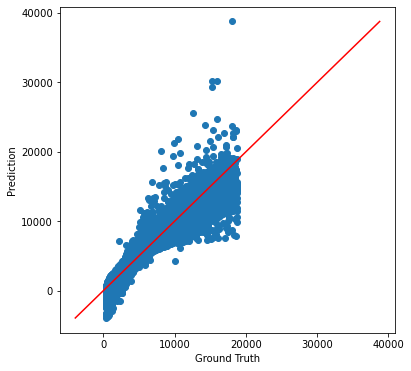

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train)
plt.plot([mini,maxi],[mini,maxi], color="red")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction");

In [52]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge

In [74]:
models = {
    "LinearRegression":LinearRegression(),
    "Poly_2":Pipeline([("poly_features",PolynomialFeatures(degree=2)),
                       ("linear_regression", LinearRegression())]),
    #"Poly_3":Pipeline([("poly_features",PolynomialFeatures(degree=3)),
    #                   ("linear_regression", LinearRegression())]),
    #"Poly_4":Pipeline([("poly_features",PolynomialFeatures(degree=4)),
    #                   ("linear_regression", LinearRegression())]),
    #"Lasso":Lasso(alpha=1),
    #"Ridge":Ridge(alpha=1),
    #"Support Vector Machine":SVR(),
    #"SGD":SGDRegressor(),
    "Random Forrest": RandomForestRegressor(),
    "Polynomial_dg_2_Lasso":Pipeline([('poly', PolynomialFeatures(degree=3)),
                                      ("lasso",Lasso(alpha=1))]),
}

In [75]:
poly = PolynomialFeatures(degree=3)

In [76]:
X_train.shape

(28318, 26)

In [77]:
v = poly.fit_transform(X_train)

In [78]:
lr = LinearRegression()
lr.fit(v,y_train)

LinearRegression()

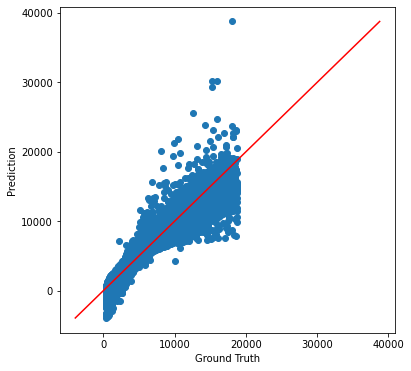

In [79]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train)
plt.plot([mini,maxi],[mini,maxi], color="red")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction");

In [80]:
results_train = {}
results_test = {}

for name,model in models.items():
    model.fit(X_train, y_train)
    results_train[name] = mse(y_train, model.predict(X_train))**.5
    results_test[name] = mse(y_test, model.predict(X_test))**.5
    print(name)

LinearRegression
Poly_2
Random Forrest


/home/peres84/miniconda3/envs/core/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5974489751.906776, tolerance: 44453615.95341073
  model = cd_fast.enet_coordinate_descent(


Polynomial_dg_2_Lasso


In [81]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame({
    "Train":results_train,
    "Test":results_test
})

,Train,Test
LinearRegression,1123.45,1122.77
Poly_2,662.08,1629.65
Random Forrest,209.13,579.48
Polynomial_dg_2_Lasso,612.61,2343.19


# Prueba a la tabla predict

In [61]:
data_predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
0,1.57,Premium,F,SI1,60.40,59.00,7.57,7.54,4.56
1,1.56,Ideal,G,SI1,61.20,56.00,7.51,7.49,4.59
2,0.70,Premium,E,VS1,58.40,59.00,5.91,5.83,3.43
3,0.90,Fair,G,SI1,65.40,57.00,6.04,5.95,3.92
4,1.22,Ideal,H,VS2,61.40,57.00,6.89,6.85,4.22


In [62]:
lr = LinearRegression()

In [63]:
X_predict = pd.get_dummies(data_predict, columns=["cut", "color", "clarity"])

In [64]:
X_predict

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
index,,,,,,,,,,,,,,,,,,,,,
0,1.57,60.40,59.00,7.57,7.54,4.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.56,61.20,56.00,7.51,7.49,4.59,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.70,58.40,59.00,5.91,5.83,3.43,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.90,65.40,57.00,6.04,5.95,3.92,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.22,61.40,57.00,6.89,6.85,4.22,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,0.46,61.80,56.00,4.97,4.93,3.06,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
16178,2.03,59.80,59.00,8.29,8.24,4.94,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
16179,0.30,62.20,61.00,4.28,4.24,2.65,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
price_predictions = lr.predict(X_predict)

In [67]:
price_predictions

array([10748.23355679, 10600.4492559 ,  3813.3819908 , ...,
         -27.9299049 ,  8505.75494331,  2571.76293004])

In [68]:
price_predictions = pd.DataFrame({'price':price_predictions}).reset_index()

In [69]:
# price_predictions = price_predictions.set_index('index')
price_predictions.set_index('index', inplace=True)

In [70]:
price_predictions

,price
index,
0,10748.23
1,10600.45
2,3813.38
3,3599.95
4,7515.82
...,...
16177,301.42
16178,13979.63
16179,-27.93


In [71]:
price_predictions.to_csv('data/my_predict.csv')

In [72]:
sample_submission = pd.read_csv("data/sample_submission.csv", index_col=0)

In [73]:
sample_submission

,price
index,
0,2155
1,2890
2,6720
3,1626
4,567
...,...
16177,6128
16178,2879
16179,6100
